In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pathlib

In [2]:
dumps = pathlib.Path('/home/daniel/debian_testing_chroot/tmp/lockin_fsk/')

## Waveform

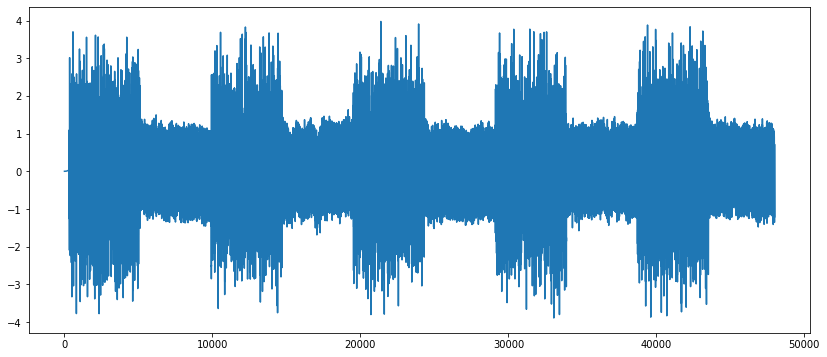

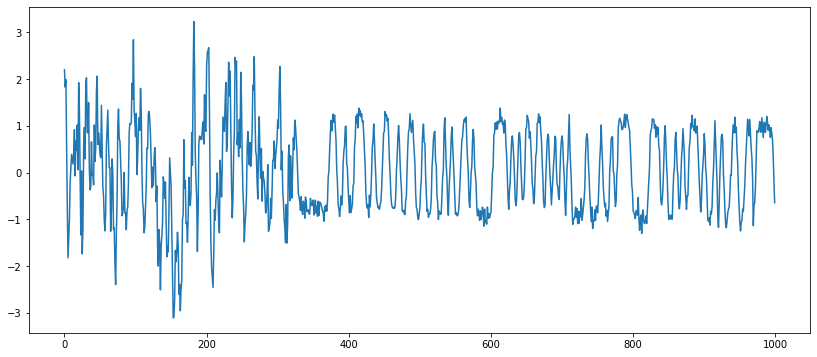

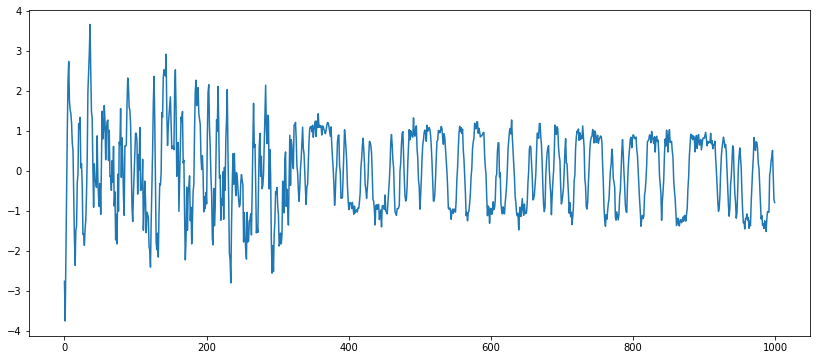

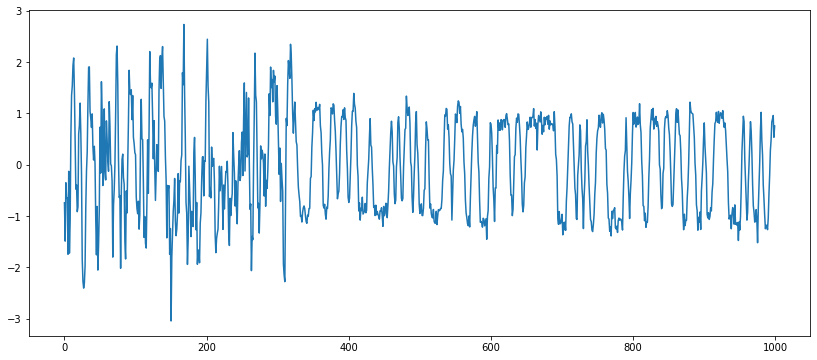

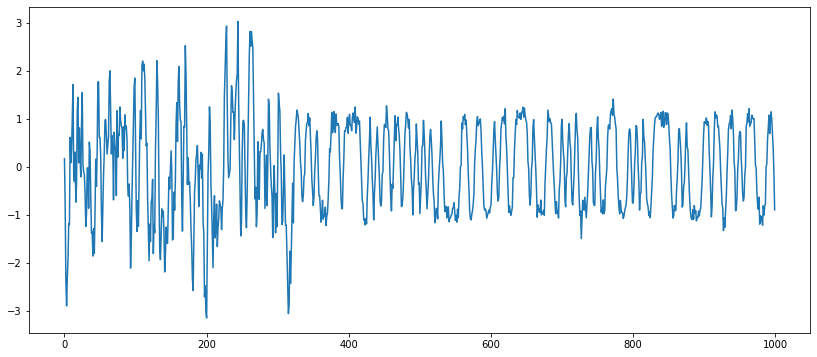

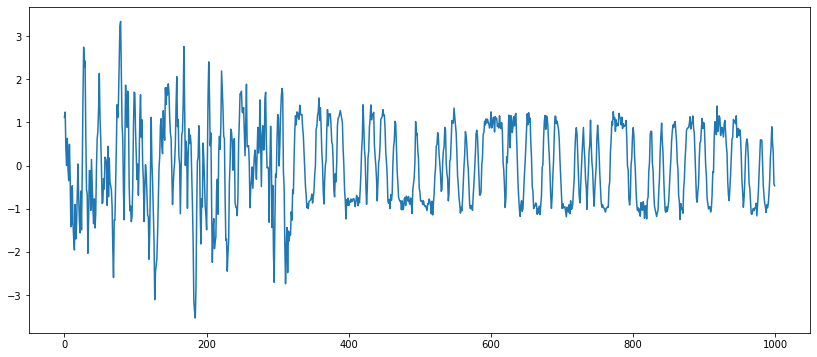

In [3]:
lock_ins = np.int32(np.arange(0.1, 1, 0.2) * 48000) + 500
lock_span = 500

waveform = np.fromfile(dumps / 'waveform.f32', dtype = 'float32')
plt.figure(figsize = (14, 6), facecolor = 'w')
plt.plot(waveform)

for lock in lock_ins:
    plt.figure(figsize = (14, 6), facecolor = 'w')
    plt.plot(waveform[lock-lock_span:lock+lock_span])

## Clock recovery

In [4]:
lock_ins = np.int32(np.arange(0.1, 1, 0.2) * 9600) + 100
lock_span = 100

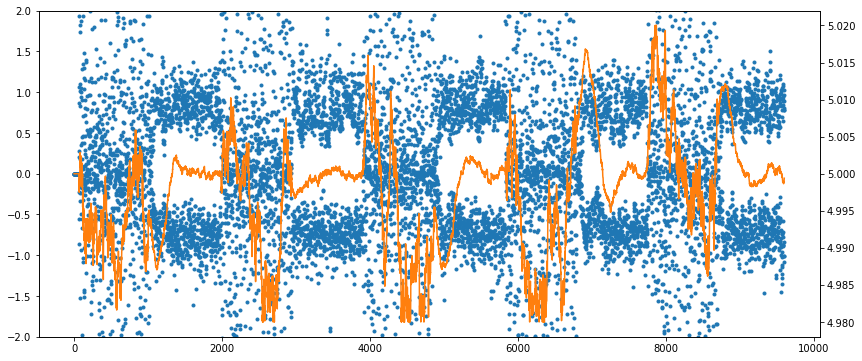

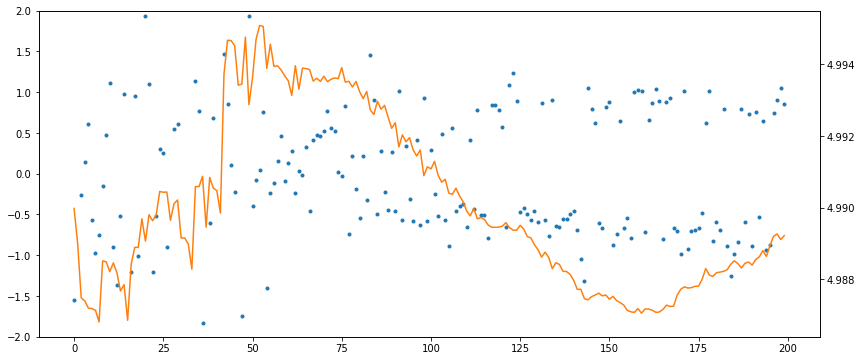

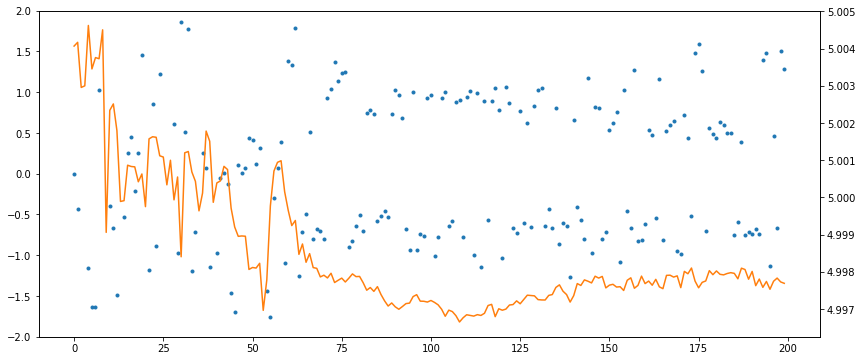

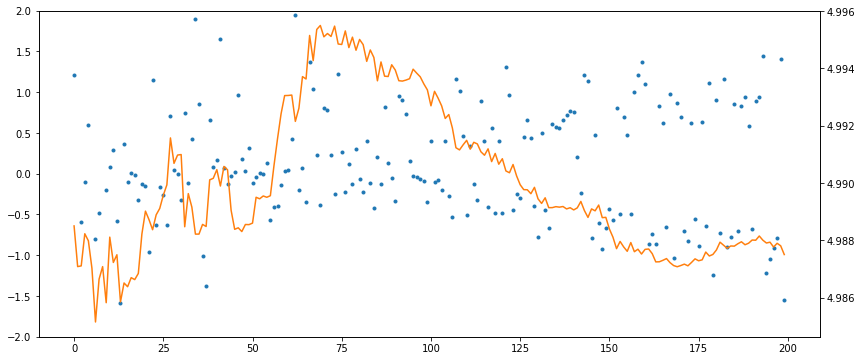

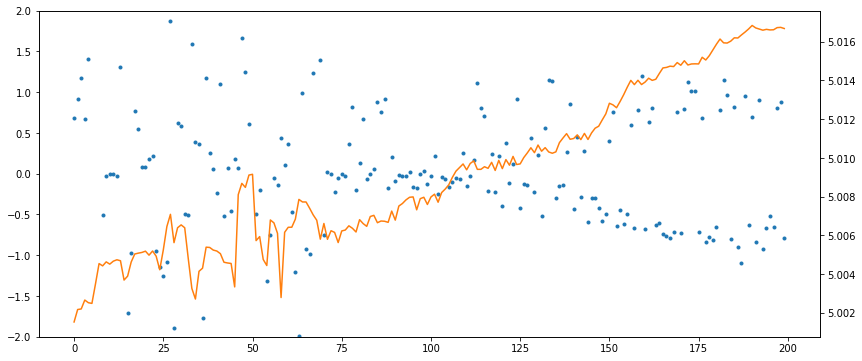

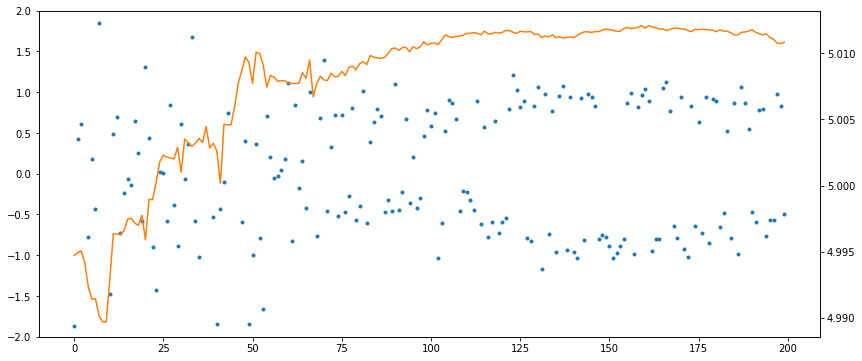

In [5]:
clock_recovery_out = np.fromfile(dumps / 'clock_recovery_out.f32', dtype = 'float32')
clock_recovery_T_avg = np.fromfile(dumps / 'clock_recovery_T_avg.f32', dtype = 'float32')
fig, ax = plt.subplots(figsize = (14, 6), facecolor = 'w')
ax2 = ax.twinx()
ax2.plot(clock_recovery_T_avg, color = 'C1')
#ax2.set_ylim((4.9,5.1))
ax.plot((clock_recovery_out[1:] * clock_recovery_out[:-1].conj()).real, '.', color = 'C0')
ax.set_ylim((-2, 2))

for lock in lock_ins:
    fig, ax = plt.subplots(figsize = (14, 6), facecolor = 'w')
    ax2 = ax.twinx()
    ax2.plot(clock_recovery_T_avg[lock-lock_span:lock+lock_span], color = 'C1')
    #ax2.set_ylim((4.9,5.1))
    ax.plot((clock_recovery_out[1:] * clock_recovery_out[:-1].conj()).real[lock-lock_span:lock+lock_span], '.', color = 'C0')
    ax.set_ylim((-2, 2))